### 4. (Regularized least squares) 
In this problem, we consider a regularized least-squares classifier without a bias in the context of legitimate-vs-spam email classification. We use the same datasets as in Prob 7 of PS2. Let $\left\{\left(x^{(i)}, y^{(i)}\right)\right\}_{i=1}^m$ and $\left\{\left(x_{\text {test }}^{(i)}, y_{\text {test }}^{(i)}\right)\right\}_{i=1}^m$ be train data and test data, respectively. The optimization problem for the considered classifier is given by:

$$
\min _{w \in \mathbf{R}^d}\|A w-b\|^2+\lambda\|w\|^2
$$

where $\lambda \geq 0$ denotes the regularization factor and $(A, b)$ are given by:

$$
A:=\left[\begin{array}{c}
x^{(1) T} \\
\vdots \\
x^{(m) T}
\end{array}\right] \in \mathbf{R}^{m \times d} \text { and } b:=\left[\begin{array}{c}
y^{(1)} \\
\vdots \\
y^{(m)}
\end{array}\right] \in \mathbf{R}^m
$$

(a) Using Gauss's trick, one can translate the optimization problem into the standard from:

$$
\min _{w \in \mathbf{R}^d}\|\bar{A} w-\bar{b}\|^2
$$

where

$$
\bar{A}:=\left[\begin{array}{c}
A \\
\sqrt{\lambda} I_{d \times d}
\end{array}\right] \in \mathbf{R}^{(m+d) \times d} \text { and } \bar{b}:=\left[\begin{array}{c}
b \\
0_{d \times 1}
\end{array}\right] \in \mathbf{R}^{m+d}
$$


This then yields the following closed-form solution:

$$
w^*=\operatorname{Pinv}(\bar{A}) \bar{b}=\left(\bar{A}^T \bar{A}\right)^{-1} \bar{A}^T \bar{b}
$$


Using a Python code below, train classifiers for different regularization factors, and print out $w^*$ for the largest $\lambda$ in the considered range.

In [5]:
import pandas as pd
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

# Load train data
data = pd.read_csv("data/train.csv")
X = data[["X1", "X2"]].values
y = data["Y"].values
m,d = X.shape

# range: 10^-2 to 10^3 (51 intervals)
lambda_ = np.logspace(-2,3,51)

# matrix preparation
A = X
zerod = np.zeros((d,1))
b = y.reshape(-1,1)
b_bar = np.concatenate( (b,zerod), 0)
for val in lambda_:
    # sqrt{lambda}*I_{d-by-d}
    Id = np.sqrt(val)*np.eye(d,d)

    # stack A and Id in a row wise
    A_bar = np.concatenate((A,Id),0)

    # solution
    w_star = pinv(A_bar)@b_bar

print(w_star)

[[-0.01223636]
 [ 0.00534895]]


(b) Define the train error. Use a Python below to plot the train error as a function of $\lambda$. Also explain the shape of the curve and describe why.

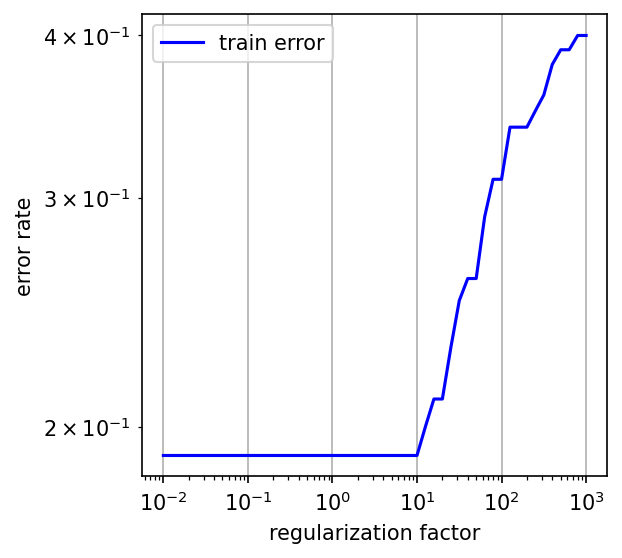

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

# Load train data
data = pd.read_csv("data/train.csv")
X = data[["X1", "X2"]].values
y = data["Y"].values
m,d = X.shape

# range: 10^-2 to 10^3 (51 intervals)
lambda_ = np.logspace(-2,3,51)
# matrix preparation
A = X
zerod = np.zeros((d,1))
b = y.reshape(-1,1)
b_bar = np.concatenate( (b,zerod), 0)

# initialization
train_error = []
for val in lambda_:
    # sqrt{lambda}*I_{d-by-d}
    Id = np.sqrt(val)*np.eye(d,d)
    # stack A and Id in a row wise
    A_bar = np.concatenate((A,Id),0)
    # solution
    w_star = pinv(A_bar)@b_bar
    # train error
    err1 = np.sign(X@w_star) != y.reshape(-1,1)
    train_error.append( sum(err1)/m )

plt.figure(figsize=(4,4), dpi=150)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("regularization factor")
plt.ylabel("error rate")
plt.plot(lambda_,train_error,c="blue",label="train error")
plt.legend()
plt.grid()
plt.savefig("results/ps03_train_error_fig.png")
plt.show()

(c) Define the test error. Use the classifiers (trained in part (a)) together with the test dataset to plot the test error as a function of $\lambda$. Also explain the shape of the curve and describe why.

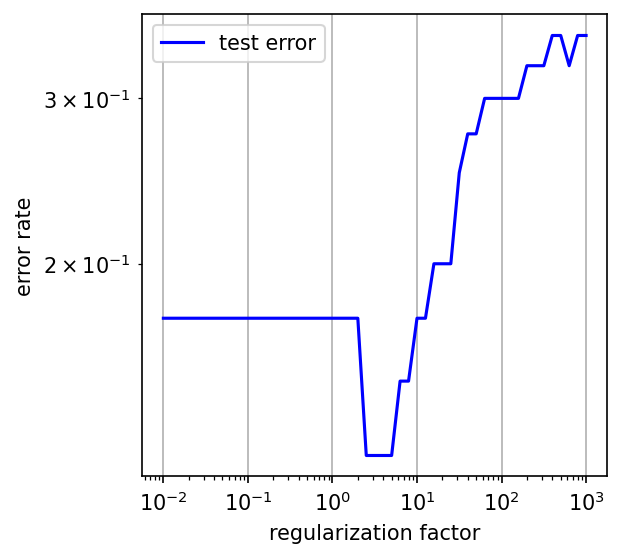

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

data = pd.read_csv("data/test.csv")
X = data[["X1", "X2"]].values
y = data["Y"].values
m,d = X.shape

# range: 10^-2 to 10^3 (51 intervals)
lambda_ = np.logspace(-2,3,51)

A = X
zerod = np.zeros((d,1))
b = y.reshape(-1,1)
b_bar = np.concatenate( (b,zerod), 0)

# get opt parameter for each lambda
w_star_dict = {}
for val in lambda_:
    Id = np.sqrt(val)*np.eye(d,d)
    A_bar = np.concatenate((A,Id),0)
    w_star_dict[val] = pinv(A_bar)@b_bar

test_error = []
for val in lambda_:
    w_star = w_star_dict[val]
    err1 = np.sign(X@w_star) != y.reshape(-1,1)
    test_error.append( sum(err1)/m )

plt.figure(figsize=(4,4), dpi=150)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("regularization factor")
plt.ylabel("error rate")
plt.plot(lambda_,test_error,c="blue",label="test error")
plt.legend()
plt.grid()
plt.savefig("results/ps03_test_error_fig.png")
plt.show()

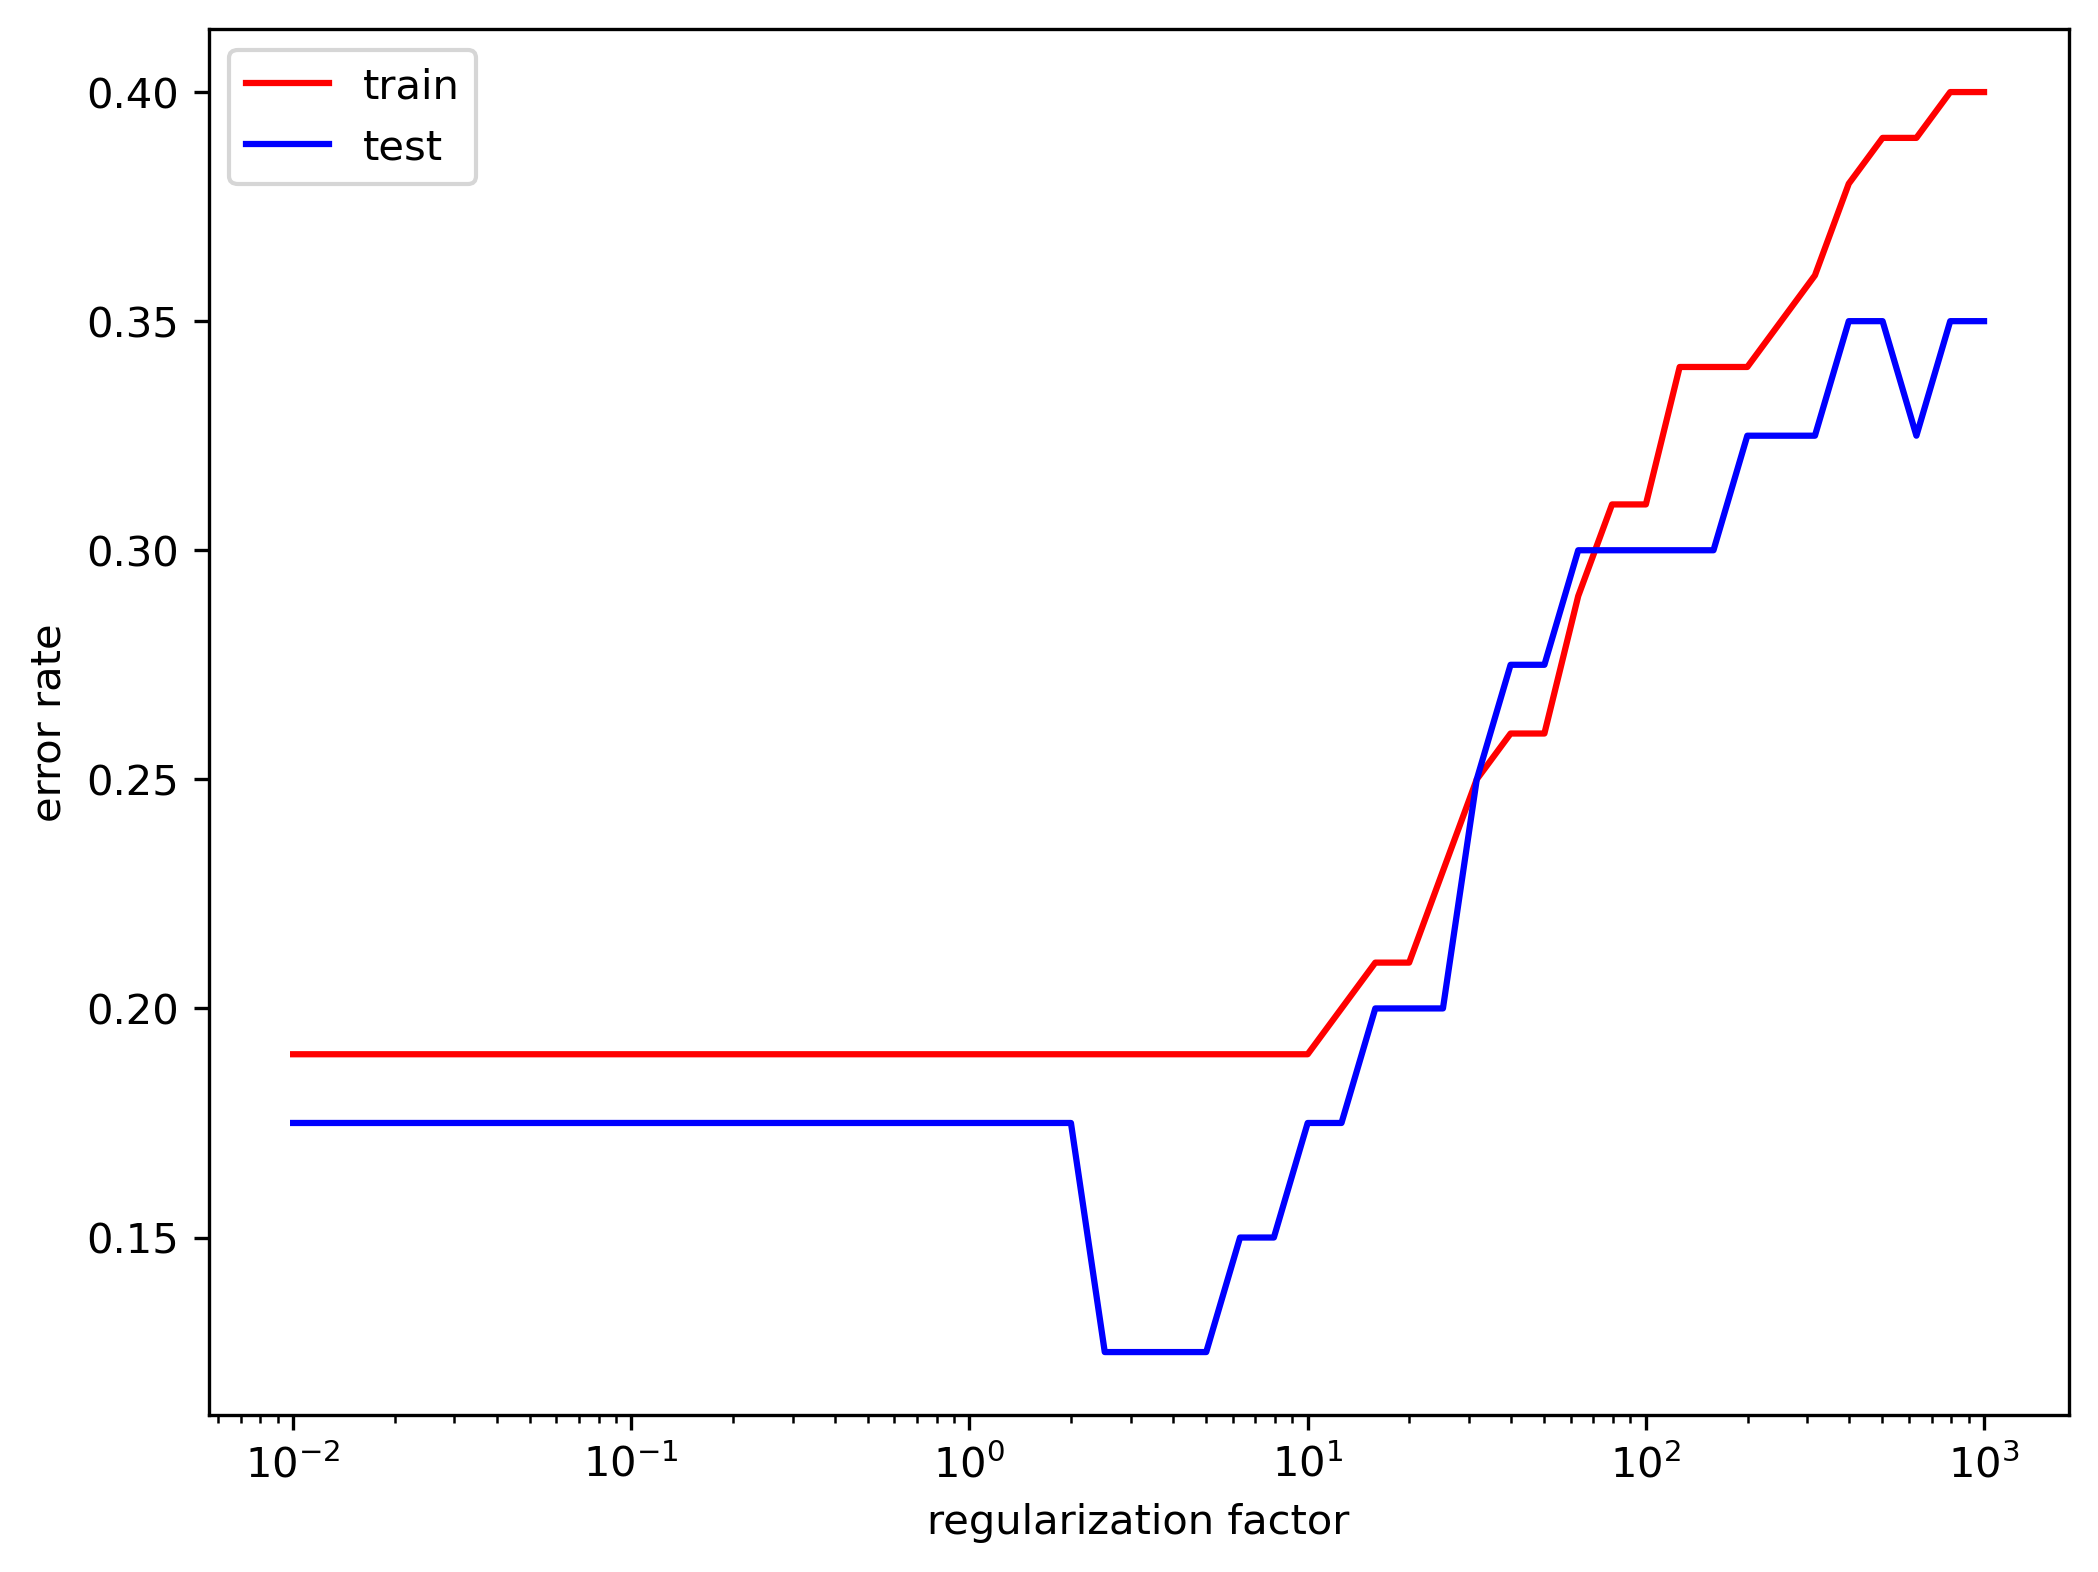

In [9]:

plt.figure(figsize=(8,6), dpi=300)
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("regularization factor")
plt.ylabel("error rate")
plt.plot(lambda_,train_error,c="red",label="train")
plt.plot(lambda_,test_error,c="blue",label="test")
plt.legend()
# plt.grid()
plt.savefig("results/ps03_test_and_train_error_fig.png")
plt.show()